<a href="https://colab.research.google.com/github/girisairam450/Episodes/blob/master/NN_MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install msgpack

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
import scipy

from PIL import Image
from scipy import ndimage

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras import regularizers
from keras.datasets import mnist

np.random.seed(7)


%matplotlib inline

Using TensorFlow backend.


In [0]:
#(x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
def one_hot(j):
    # input is the target dataset of shape (1, m) where m is the number of data points
    # returns a 2 dimensional array of shape (10, m) where each target value is converted to a one hot encoding
    # Look at the next block of code for a better understanding of one hot encoding
    n = j.shape[0]
    new_array = np.zeros((10, n))
    index = 0
    for res in j:
        new_array[res][index] = 1.0
        index = index + 1
    return new_array

In [5]:
data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
one_hot(data)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [0]:
def data_wrapper():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    training_inputs = x_train.T
    training_results = y_train
    train_set_y = one_hot(training_results)
    
    validation_inputs = x_test.T
    validation_results = y_test
    validation_set_y = one_hot(validation_results)
    
    return (training_inputs, train_set_y, validation_inputs, validation_set_y)

In [0]:
train_set_x, train_set_y, test_set_x, test_set_y = data_wrapper()

In [0]:
train_set_x = train_set_x.T
train_set_y = train_set_y.T
test_set_x = test_set_x.T
test_set_y = test_set_y.T

In [9]:
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


train_set_x shape: (60000, 28, 28)
train_set_y shape: (60000, 10)
test_set_x shape: (10000, 28, 28)
test_set_y shape: (10000, 10)


In [0]:
train_set_x = train_set_x.reshape(60000,784)
test_set_x  =test_set_x.reshape(10000,784)

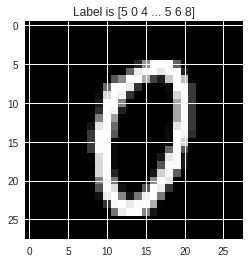

In [11]:
index  = 1000
k = train_set_x[index,:]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label= y_train))
plt.imshow(k, cmap='gray')

In [0]:
# create model
nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation=tf.nn.relu))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(21, activation = 'relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(16, activation = 'relu'))
nn_model.add(Dense(10, activation='softmax'))

In [0]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 35)                27475     
_________________________________________________________________
dropout_7 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 21)                756       
_________________________________________________________________
dropout_8 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                352       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                170       
Total params: 28,753
Trainable params: 28,753
Non-trainable params: 0
_________________________________________________________________


In [33]:
nn_model.fit(train_set_x, train_set_y, epochs=30, batch_size=10)

Epoch 1/30
60000/60000 [==============================] - 10s 164us/step - loss: 8.9124 - acc: 0.4388
Epoch 2/30
60000/60000 [==============================] - 9s 153us/step - loss: 6.4534 - acc: 0.5931
Epoch 3/30
60000/60000 [==============================] - 9s 152us/step - loss: 5.9488 - acc: 0.6264
Epoch 4/30
60000/60000 [==============================] - 9s 152us/step - loss: 5.5471 - acc: 0.6521
Epoch 5/30
60000/60000 [==============================] - 9s 153us/step - loss: 5.1700 - acc: 0.6739
Epoch 6/30
60000/60000 [==============================] - 9s 155us/step - loss: 3.9273 - acc: 0.6846
Epoch 7/30
60000/60000 [==============================] - 9s 153us/step - loss: 1.8249 - acc: 0.5571
Epoch 8/30
60000/60000 [==============================] - 9s 153us/step - loss: 1.5827 - acc: 0.5439
Epoch 9/30
60000/60000 [==============================] - 10s 165us/step - loss: 1.4068 - acc: 0.5519
Epoch 10/30
60000/60000 [==============================] - 9s 158us/step - loss: 1.2811 -

In [34]:
scores_train = nn_model.evaluate(train_set_x, train_set_y)
print("\n%s: %.2f%%" % (nn_model.metrics_names[1], scores_train[1]*100))

60000/60000 [==============================] - 2s 30us/step

acc: 92.55%


In [35]:
predictions = nn_model.predict(test_set_x)
predictions = np.argmax(predictions, axis = 1)
predictions

array([7, 2, 1, ..., 4, 8, 6])

In [36]:
scores_test = nn_model.evaluate(test_set_x, test_set_y)
print("\n%s: %.2f%%" % (nn_model.metrics_names[1], scores_test[1]*100))

10000/10000 [==============================] - 0s 28us/step

acc: 92.09%


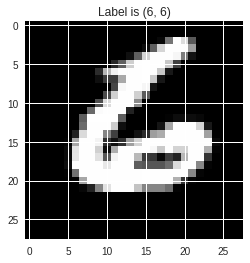

In [37]:
index  = 9999
k = test_set_x[index, :]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label=(predictions[index], np.argmax(test_set_y, axis = 1)[index])))
plt.imshow(k, cmap='gray')